# Linear Methods of Dimensionality Reduction
## Implementation of PCA for face recognition 
This code is referenced from sklearn documentation here:
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
    

In [18]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load the Labelled Faced in the Wild (LFW) dataset built into skleard datasets
# https://scikit-learn.org/0.19/datasets/labeled_faces.html
# LFW dataset contains a total of 13233 JPEG images of faces of 5749 famous persons collected
# from the web. Each original image has 2914 features (pixels per image)


# In this example, we will load only those image which have a minimum of 
# 100 images of a person and resize each image to 40% of its original size
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

X = lfw.data                      # Take Flattened face images in X
y = lfw.target                    # Class labels in y for each image in X
target_names = lfw.target_names   # Names of people in target_names
h, w = lfw.images[0].shape        # Dimensions (height and width) of each Image 

print("Total number of images loaded", X.shape[0])
print(f"Height and Width of Each Reduced Size Image: {h}, {w}")
print("Number of pixels per image (after size reduction)", X.shape[1])
print("Names of Persons whose Images are Loaded (Target Names)", target_names)

Total number of images loaded 1140
Height and Width of Each Reduced Size Image: 50, 37
Number of pixels per image (after size reduction) 1850
Names of Persons whose Images are Loaded (Target Names) ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [19]:
# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Step 3: Apply Standardization to Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Apply PCA for dimensionality reduction
# We will find 200 principal components of each image
n_components = 200
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 5: Train a Logistic Regression classifier on Principal Components
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_pca, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test_pca)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

                   precision    recall  f1-score   support

     Colin Powell       0.86      0.87      0.87        78
  Donald Rumsfeld       0.70      0.68      0.69        38
    George W Bush       0.87      0.87      0.87       159
Gerhard Schroeder       0.81      0.87      0.84        30
       Tony Blair       0.80      0.76      0.78        37

         accuracy                           0.84       342
        macro avg       0.81      0.81      0.81       342
     weighted avg       0.84      0.84      0.84       342

Confusion Matrix:

[[ 68   3   5   1   1]
 [  2  26   7   1   2]
 [  8   7 139   2   3]
 [  0   0   3  26   1]
 [  1   1   5   2  28]]


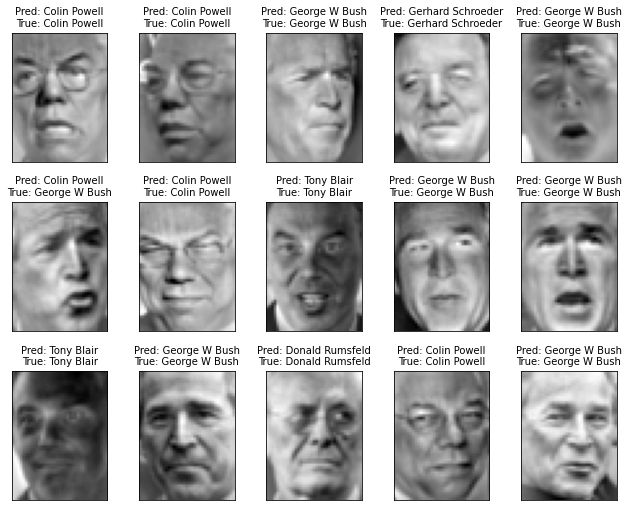

In [20]:
# Step 7: Plot test images with predictions
def image_title(y_pred, y_true, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_true[i]]
    return f'Pred: {pred_name}\nTrue: {true_name}'

def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(()), plt.yticks(())
    plt.tight_layout()
    plt.show()

titles = [image_title(y_pred, y_test, target_names, i) for i in range(len(y_pred))]
plot_gallery(X_test, titles, h, w)



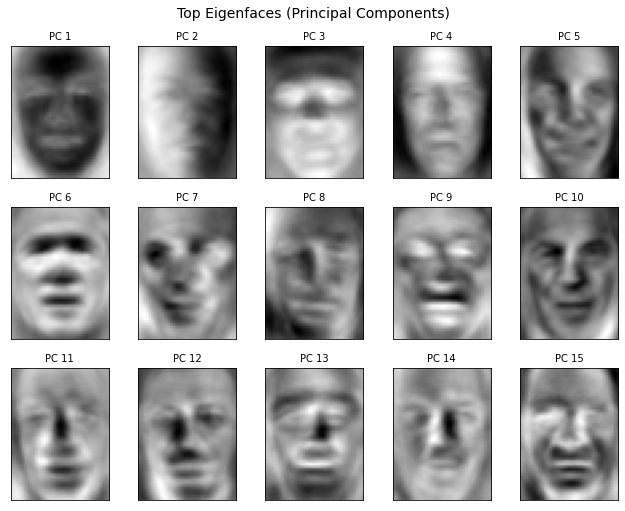

In [21]:
# Step 8: Visualize eigenfaces
# Let us reshape principal components into h*w size for visualization as two dimensional image
# pca.components_ is a NumPy array of shape (n_components, n_features)
# Each row of this array is a principal component.
# Each component is a flattened image vector of length n_features = h × w.
# reshape((n_components, h, w)) converts these flat vectors back into 2D image shapes:
# So now eigenfaces is an array of shape (n_components, h, w).
# We can visualize them as grayscale images using matplotlib

eigenfaces = pca.components_.reshape((n_components, h, w))

def plot_eigenfaces(eigenfaces, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
        plt.title(f"PC {i+1}", size=10)
        plt.xticks(()), plt.yticks(())
    plt.suptitle("Top Eigenfaces (Principal Components)", size=14)
    plt.tight_layout()
    plt.show()

plot_eigenfaces(eigenfaces, h, w)

## Implementation of Singular Value Decomposition (TruncatedSVD) on LFW dataset

In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load LFW dataset
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw.data
y = lfw.target
target_names = lfw.target_names
h, w = lfw.images[0].shape

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Truncated SVD
n_components = 150
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

# Step 6: Train a classifier
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_svd, y_train)

# Step 7: Evaluate model
y_pred = clf.predict(X_test_svd)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

                   precision    recall  f1-score   support

     Colin Powell       0.90      0.85      0.87        78
  Donald Rumsfeld       0.71      0.76      0.73        38
    George W Bush       0.89      0.90      0.89       159
Gerhard Schroeder       0.79      0.77      0.78        30
       Tony Blair       0.76      0.78      0.77        37

         accuracy                           0.85       342
        macro avg       0.81      0.81      0.81       342
     weighted avg       0.85      0.85      0.85       342

Confusion Matrix:

[[ 66   5   5   1   1]
 [  0  29   6   2   1]
 [  4   7 143   1   4]
 [  2   0   2  23   3]
 [  1   0   5   2  29]]


# Non-Linear Methods of Dimensionality Reduction

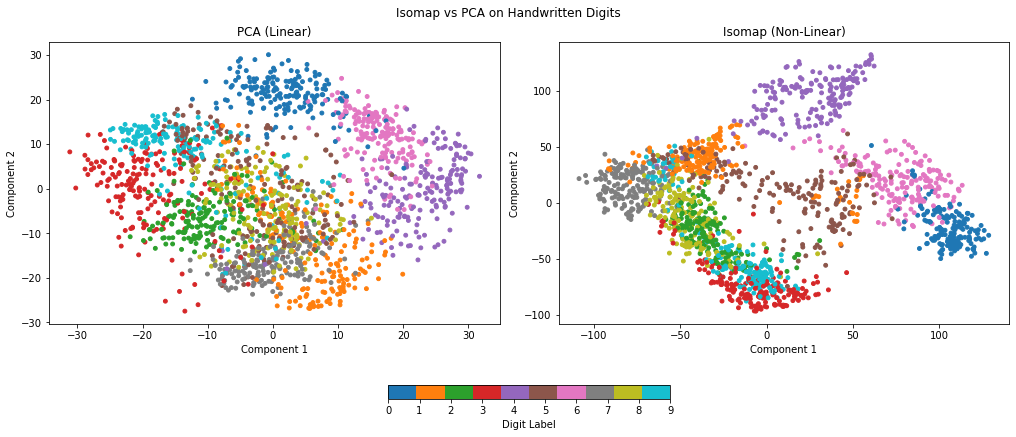

In [5]:
#Isomap
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

# Create plots with constrained layout
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# PCA plot
sc1 = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.tab10, s=15)
axs[0].set_title("PCA (Linear)")
axs[0].set_xlabel("Component 1")
axs[0].set_ylabel("Component 2")

# Isomap plot
sc2 = axs[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap=plt.cm.tab10, s=15)
axs[1].set_title("Isomap (Non-Linear)")
axs[1].set_xlabel("Component 1")
axs[1].set_ylabel("Component 2")

# Shared colorbar
fig.colorbar(sc2, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='Digit Label')

# Super title
plt.suptitle("Isomap vs PCA on Handwritten Digits")
plt.show()


## t-SNE

C:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


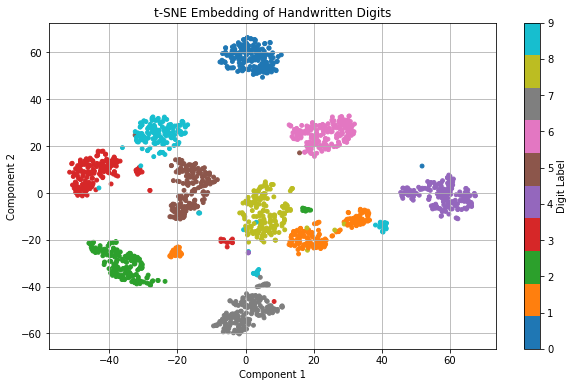

In [7]:
#t-SNE
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load digits data
digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
#tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', random_state=42)

X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.tab10, s=15)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title("t-SNE Embedding of Handwritten Digits")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

## UMAP

Create a new python environment to run UMAP library. Umap-learn (https://pypi.org/project/umap-learn/) is a Python library that implements UMAP non-linear dimensionality reduction algorithm. Umap-learn depends on scikit-learn, numpy and scipy with additional requirement for numba library.  You can create a new Python environment in your computer and install the required libraries as follows: 

!pip install umap-learn 


In [ ]:
#UMAP on digits dataset
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load sample data
digits = load_digits()
X = digits.data
y = digits.target

# Apply UMAP (sklearn-style API)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# Plot the result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=plt.cm.tab10, s=10)
plt.colorbar(scatter, label='Digit Label', ticks=range(10))
plt.title("UMAP Projection of the Digits Dataset")
plt.grid(True)
plt.show()

## LLE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

# Generate the Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1500, noise=0.05)

# Apply LLE
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='standard',
                             random_state=42)
X_lle = lle.fit_transform(X)

# Plot original 3D Swiss Roll
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll (3D)")

# Plot 2D LLE embedding
ax2 = fig.add_subplot(1, 2, 2)
scatter = ax2.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("LLE Embedding (2D)")
ax2.set_xlabel("Component 1")
ax2.set_ylabel("Component 2")
plt.tight_layout()
plt.show()

## Autoencoders

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.2763 - val_loss: 0.1897
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1710 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1442 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1288 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1186 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1115 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1066 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1030 - val_loss: 0.1003
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1002 - val_loss: 0.0978
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0980 - val_loss: 0.0959

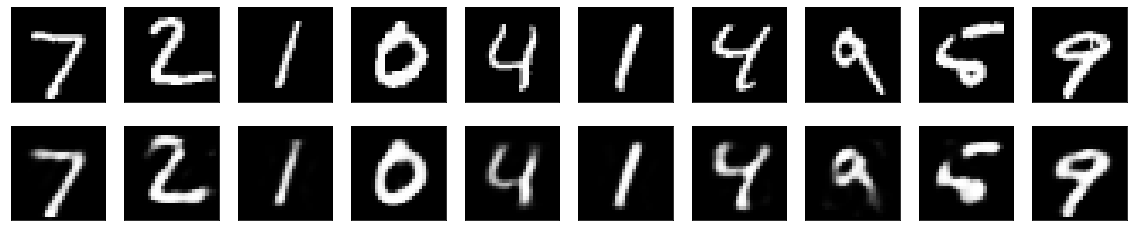

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Define the size of the encoding
encoding_dim = 32
# Define the input layer
input_img = Input(shape=(784,))
# Define the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Define the decoded layer
decoded = Dense(784, activation='sigmoid')(encoded)
# Build the autoencoder model
autoencoder = Model(input_img, decoded)
# Build the encoder model
encoder = Model(input_img, encoded)
# Build the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
# Use the encoder to get the reduced representation of the test data
encoded_imgs = encoder.predict(x_test)
# Visualize the original and the reconstructed images
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # Display first 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
